# Final Assignment

### Import Python Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

### TASK 1. Familiarizing with Dataset

·      CRIM - per capita crime rate by town<br>
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
·      INDUS - proportion of non-retail business acres per town.<br>
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise).<br>
·      NOX - nitric oxides concentration (parts per 10 million).<br>
·      RM - average number of rooms per dwelling<br>
·      AGE - proportion of owner-occupied units built prior to 1940.<br>
·      DIS - weighted distances to five Boston employment centres.<br>
·      RAD - index of accessibility to radial highways<br>
·      TAX - full-value property-tax rate per $\$10,000.$ <br>
.      PTRATIO - pupil-teacher ratio by town.<br>
·      LSTAT - $%$ lower status of the population <br>
·      MEDV - Median value of owner-occupied homes in $\$1000's$

### TASK 2. Work in Watson Studio instance

# TASK 3. Loading Boston housing prices dataset 

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [3]:
# Print the datset's head
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# TASK 4. Generate Basic Statistics un visualizations

### Check if there is missing values

In [4]:
boston_df.isnull().sum().sum() # if 0 so no missing values

0

In [5]:
# print data types of the dataframe
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

### Statistical summary of Boston DataFrame (including all objects)

In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 1) Provide a boxplot for the "Median value of owner-occupied homes".

In [7]:
print("mean value of data : ", round(boston_df["MEDV"].mean(), 2))
print("max value of data : ", round(boston_df["MEDV"].max(), 2))
print("min value of data : ", round(boston_df["MEDV"].min(), 2))
print("median value of data : ", round(boston_df["MEDV"].median(), 2))

mean value of data :  22.53
max value of data :  50.0
min value of data :  5.0
median value of data :  21.2


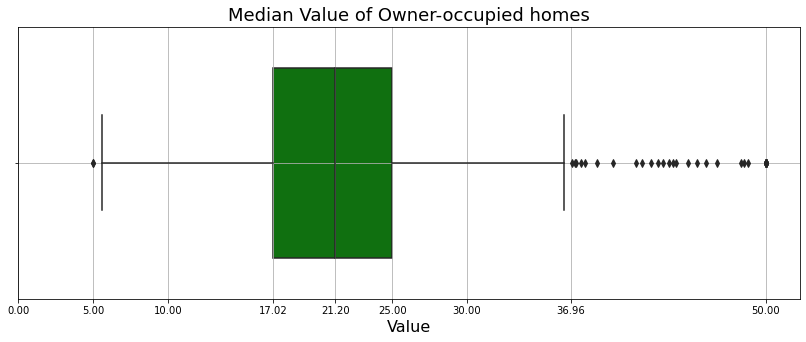

In [8]:
plt.figure(figsize=(14,5))
ax = sns.boxplot(x="MEDV", data=boston_df, width=0.7, color="green", showcaps =True)
ax.set_title("Median Value of Owner-occupied homes", fontsize=18)
ax.set_xlabel("Value", fontsize=16)
ax.set_xticks([0, 5 , 10, 21.2, 17.025, 25, 30, 36.96, 50])
plt.grid()

In [9]:
# Compute Box plot parameters
Q1, Q2, Q3 = boston_df["MEDV"].quantile([0.25, 0.5, 0.75])
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("First Quartile: ", Q1)
print("Third Quartile: ", Q3)
print("Median (2nd Quartile):", Q2)
print("Interquartile range is: ", round(IQR,2))
print("lower 1.5*IQR whisker:", round(lower_whisker, 2))
print("upper 1.5*IQR whisker:", round(upper_whisker, 2))

First Quartile:  17.025
Third Quartile:  25.0
Median (2nd Quartile): 21.2
Interquartile range is:  7.98
lower 1.5*IQR whisker: 5.06
upper 1.5*IQR whisker: 36.96


#### Discussion:<br> 
We notice more than 1 outliers in the data.

### 2) Provide a Barplot for the Charles River variable.

In [10]:
# Since "CHAS" column is categorical it is better to convert it to integer type. 
boston_df = boston_df.astype({"CHAS" : int})
boston_df['CHAS'].dtypes

dtype('int64')

In [11]:
# Check CHAS data
boston_df[["CHAS"]][140:145]

,CHAS
140,0
141,0
142,1
143,0
144,0


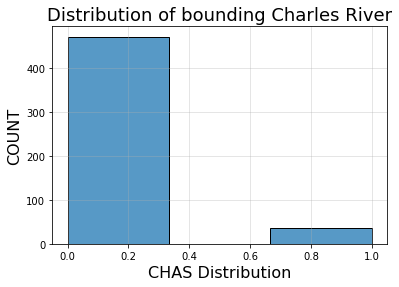

In [12]:
ax=sns.histplot(x="CHAS", data=boston_df, bins=3)
ax.set_title("Distribution of bounding Charles River", fontsize=18)
ax.set_xlabel("CHAS Distribution", fontsize=16)
ax.set_ylabel("COUNT", fontsize=16)
ax.grid(alpha=0.4)

In [13]:
# Number of homes bounded by Charles River
print("Number of homes bounded by Charles River: ",(boston_df["CHAS"]==1).sum())
print("Number of homes not bounded by Charles River: ",(boston_df["CHAS"]==0).sum())

Number of homes bounded by Charles River:  35
Number of homes not bounded by Charles River:  471


#### Discussion:<br> 
Few houses (only 35) are bounded by Charles River

### 3) Provide a boxplot for the MEDV variable vs the AGE variable

In [14]:
boston_df.loc[boston_df["AGE"]<=35., "AGE_GROUP"] = "35 Years and Younger"
boston_df.loc[(boston_df["AGE"]>35)&(boston_df["AGE"]<70), "AGE_GROUP"] = "Between 35 and 70 years"
boston_df.loc[boston_df["AGE"]>=70, "AGE_GROUP"] = "70 Years and Older"

In [15]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 Years and Older
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years


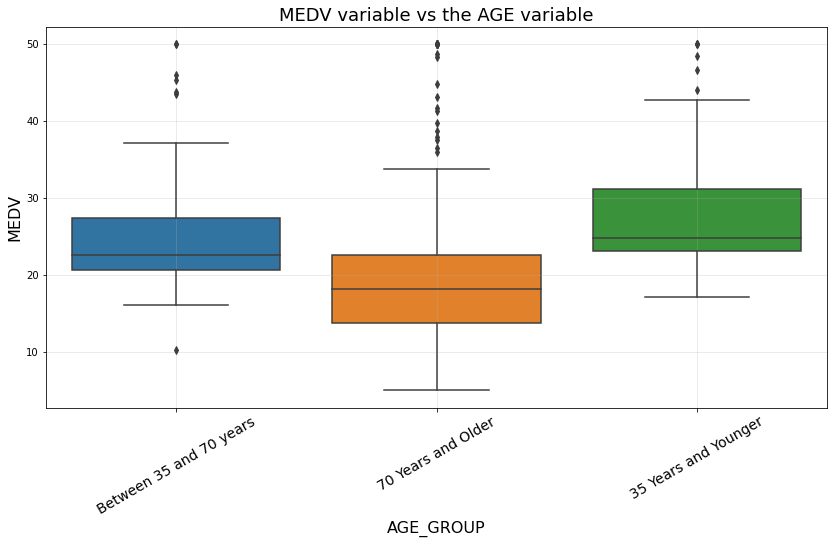

In [16]:
plt.figure(figsize=(14,7))
ax = sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df) 
ax.set_title("MEDV variable vs the AGE variable",fontsize=18)
ax.set_xlabel("AGE_GROUP", fontsize=16)
ax.set_ylabel("MEDV", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, fontsize=14)
ax.grid(alpha=0.3)

In [17]:
# Compute Medians
median_35_y = boston_df[boston_df["AGE_GROUP"] == "35 Years and Younger"][['MEDV']].median()[0]
median_35_70 = boston_df[boston_df["AGE_GROUP"] == "Between 35 and 70 years"][['MEDV']].median()[0]
median_70_o = boston_df[boston_df["AGE_GROUP"] == "70 Years and Older"][['MEDV']].median()[0]
print("median_35_y:", median_35_y)
print("median_35_70:", median_35_70)
print("median_70_o:", median_70_o)

median_35_y: 24.8
median_35_70: 22.6
median_70_o: 18.2


#### Discussion:<br> 
From the results above we note that the oldest people tend to buy the cheaper houses.

### 4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Text(0, 0.5, 'INDUS')

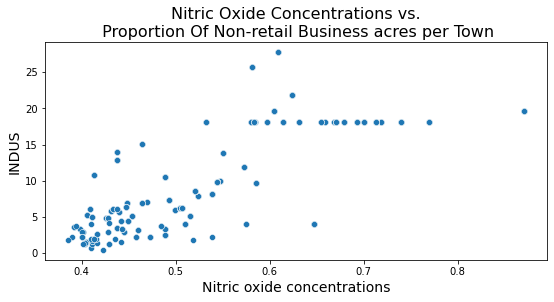

In [18]:
# plot NOX vs INDUS
plt.figure(figsize=(9,4))
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set_title("Nitric Oxide Concentrations vs.\n Proportion Of Non-retail Business acres per Town", fontsize=16)
ax.set_xlabel("Nitric oxide concentrations", fontsize=14)
ax.set_ylabel("INDUS", fontsize=14)

#### Discussion
What can you say about the relationship?<br>from the visualization, we notice that the proportion of Proportion Of Non-retail Business acres per Town is linearly related (with positive slope) to the rate of Nitric Oxide Concentrations

### 5) Create a histogram for the pupil to teacher ratio variable.

Text(0, 0.5, 'Count')

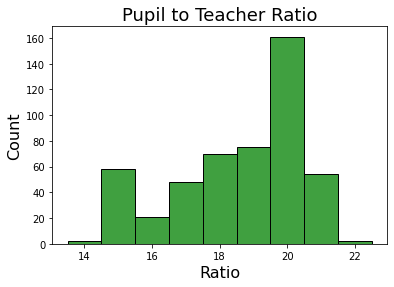

In [19]:
bins = np.arange(13.5, 23.5, 1)
ax=sns.histplot(x="PTRATIO", bins=bins, data=boston_df, color="green")
ax.set_title("Pupil to Teacher Ratio", fontsize=18)
ax.set_xlabel("Ratio", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

#### Discussion
1- Ration increases within the range (15 to 19) and makes a higher score in 20, finally it decreases from  the ration of 21

# Task 5. Use the appropriate tests to answer the questions provided

### - Question 1: Is there a significant difference in the median value of houses bounded by the Charles River or not?

State Hypothesis:<br>
Null-hypothesis $H_0$: There is no difference in the median value bounded by Charles River.<br>
Aletrnate hypothesis $H_1$: There is a difference.

In [20]:
# check test significance "equality of variances"
scipy.stats.levene(boston_df[boston_df["CHAS"] == 1]["MEDV"],
                  boston_df[boston_df["CHAS"] == 0]["MEDV"], center = "mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 so, we can't assume the equalty of variance

In [21]:
result1 = scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"],
                     boston_df[boston_df["CHAS"] == 0]["MEDV"], equal_var=False)

In [22]:
print("p-value = ", round(result1[1], 4))

p-value =  0.0036


#### Conclusion:<br>Since the p-value < 0.05, we reject the null-hypothesis as there is enough proof that there is a statistical difference in the median value of houses bounded by the Charles River

#

### - Question 2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

First, We group data into categories and we will use ANOVA to respond to question:<br>
* 35 Years and Younger.
* Between 35 and 70 years.
* 70 Years and Older

State Hypothesis:<br>
Null-hypothesis $H_0$: There is no difference in the median value of each proportion of owner-occupied units built before 1940.<br>
Aletrnative hypothesis $H_1$: There is a difference.

#### Test for equality of variance

In [23]:
proportion1 = boston_df[boston_df["AGE_GROUP"] == "35 Years and Younger"]["MEDV"]
proportion2 = boston_df[boston_df["AGE_GROUP"] == "Between 35 and 70 years"]["MEDV"]
proportion3 = boston_df[boston_df["AGE_GROUP"] == "70 Years and Older"]["MEDV"]

In [24]:
scipy.stats.levene(proportion1, proportion2, proportion3, center="mean")

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the ($p-value = 0.0629$) is greater than ($\alpha$ $= 0.05$) the variances are equal.

In [25]:
f_statistic, p_value = scipy.stats.f_oneway(proportion1, proportion2, proportion3)
print("F-statistic: {:.3f} and P-value: {:.5} ".format(f_statistic, p_value))

F-statistic: 36.408 and P-value: 1.7105e-15 


#### Conclusion:<br>Since the p-value=$1.7105e-15$ is less than $\alpha = 0.05$, we will reject the null hypothesis as there is a significant evidence that at least one of the means differ.

###

### - Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

State the hypothesis:<br>
* $𝐻_0$: There is no relationship between NOX and INDUS data.
* $𝐻_1$: There is relationship between NOX and INDUS data.

In [26]:
result2 = scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])
result2

(0.7636514469209151, 7.913361061238693e-98)

In [27]:
print("p-value :", result2[1])

p-value : 7.913361061238693e-98


#### Conclusion:<br> Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

#

### - Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

State the hypothesis:<br>
* $𝐻_0$: There is no correlation between DIS and MEDV data.
* $𝐻_1$: There is correlation between DIS and MEDV data.

Text(0, 0.5, 'MEDV')

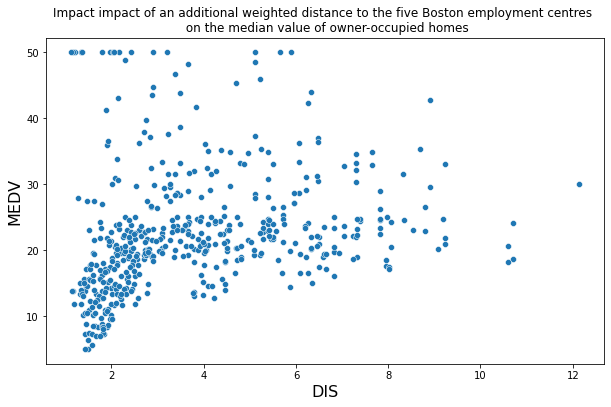

In [28]:
plt.figure(figsize=(10, 6))
ax=sns.scatterplot(x = "DIS", y="MEDV", data=boston_df)
ax.set_title("Impact impact of an additional weighted distance to the five Boston employment centres \n on the median value of owner-occupied homes")
ax.set_xlabel("DIS", fontsize=16)
ax.set_ylabel("MEDV", fontsize=16)

In [29]:
result3 = scipy.stats.pearsonr(boston_df["DIS"], boston_df["MEDV"])
result3

(0.2499287340859039, 1.2066117273368017e-08)

In [30]:
print("The p-value: ", result3[1])

The p-value:  1.2066117273368017e-08


#### Conclusion:<br> 1- There is a proportional relationship between the two variables, such that when additional weighted distance to 5 centers increases there will be an increase in median value of ooh.

#

### Thank you for reviewing                                                              *